In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, learning_curve

### **Data Exploration**

In [ ]:
# Load the dataset
weather_df = pd.read_csv('australia-weather.csv')
weather_df.info()
weather_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [17]:
# Display the statistics of the dataset
weather_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [18]:
# Check for unique, missing and duplicated values
inspection_df = pd.DataFrame({
    'Unique': weather_df.nunique(),
    'Missing': weather_df.isnull().sum(),
    'Type': weather_df.dtypes,
    'Sample': weather_df.loc[0],
    'Duplicate': weather_df.duplicated().sum()
})
inspection_df

,Unique,Missing,Type,Sample,Duplicate
Date,3436,0,object,2008-12-01,0
Location,49,0,object,Albury,0
MinTemp,389,1485,float64,13.4,0
MaxTemp,505,1261,float64,22.9,0
Rainfall,681,3261,float64,0.6,0
Evaporation,358,62790,float64,NaN,0
Sunshine,145,69835,float64,NaN,0
WindGustDir,16,10326,object,W,0
WindGustSpeed,67,10263,float64,44.0,0
WindDir9am,16,10566,object,W,0


### **Data Visualization**

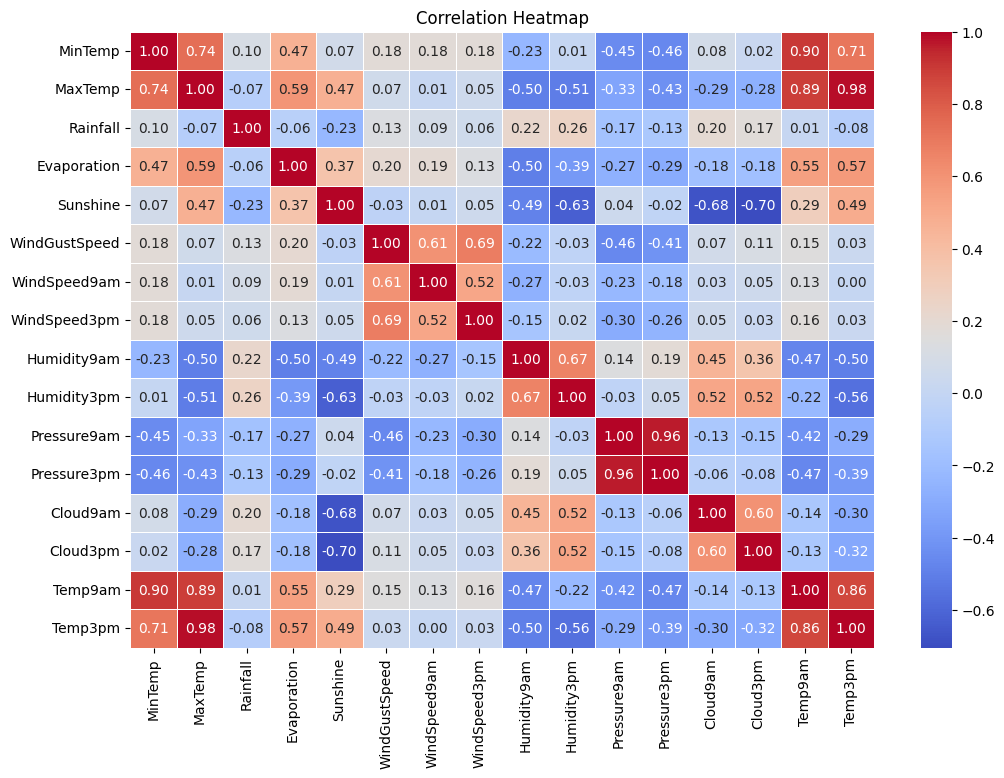

In [30]:
# Visualize the correlation heatmap of the dataset
corr = weather_df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

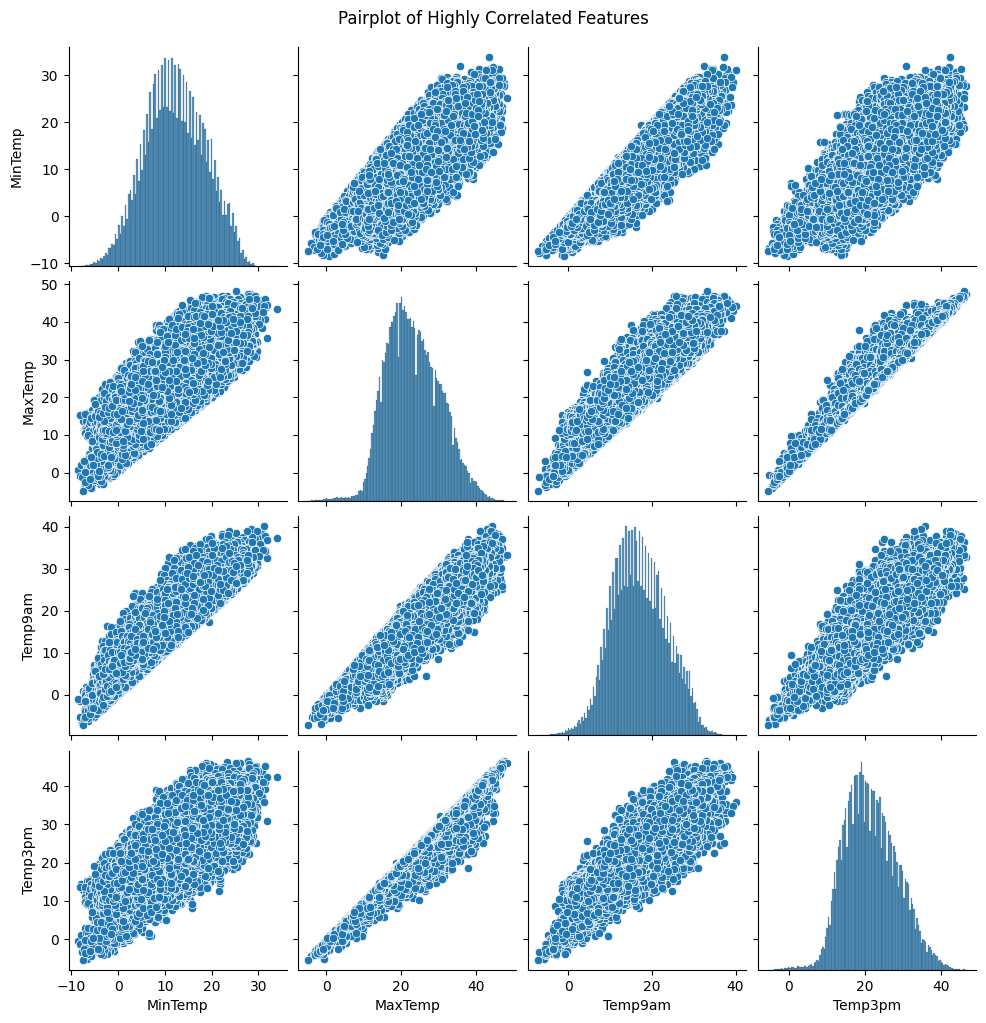

In [36]:
# Visualize the highly correlated features
sns.pairplot(weather_df[['MinTemp',
                           'MaxTemp',
                           'Temp9am',
                           'Temp3pm']])
plt.suptitle('Pairplot of Highly Correlated Features', y=1.02)
plt.show()

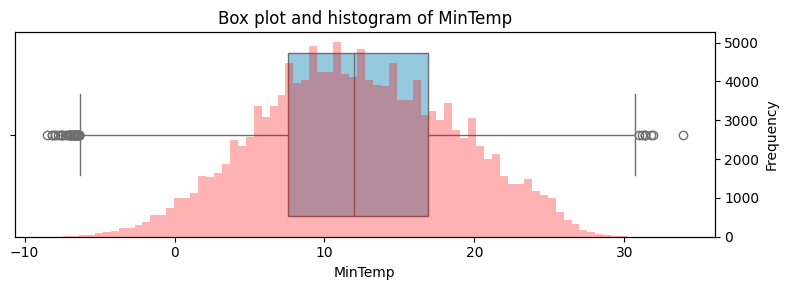

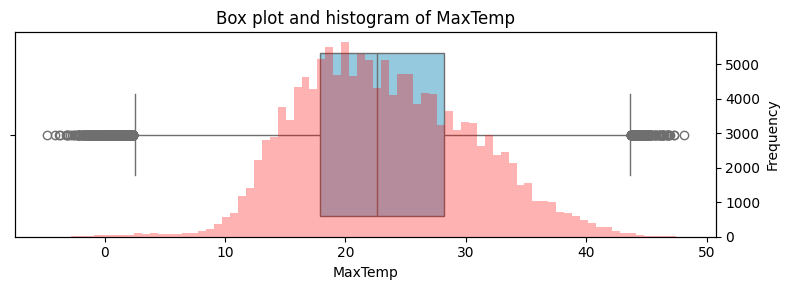

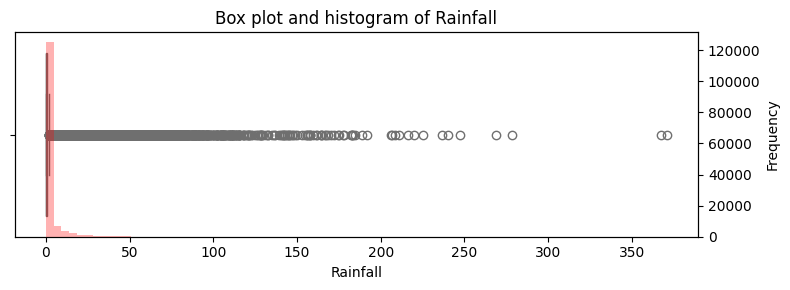

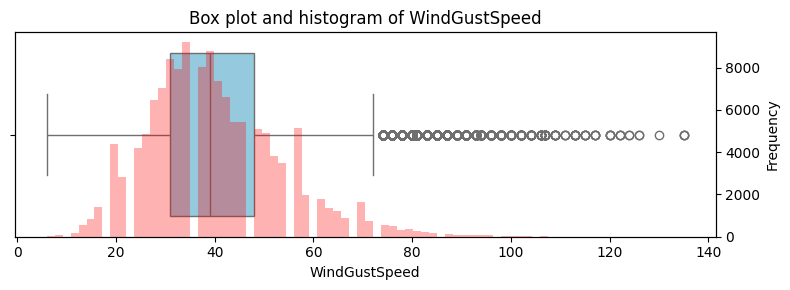

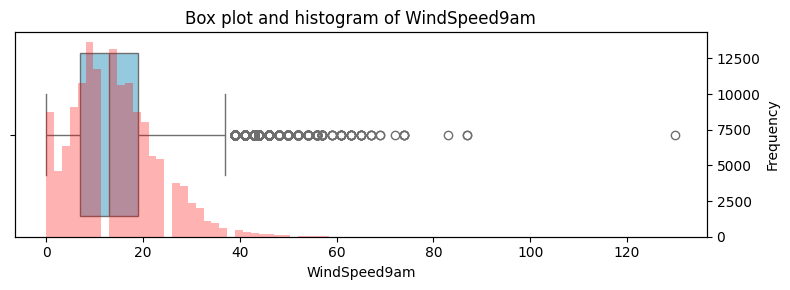

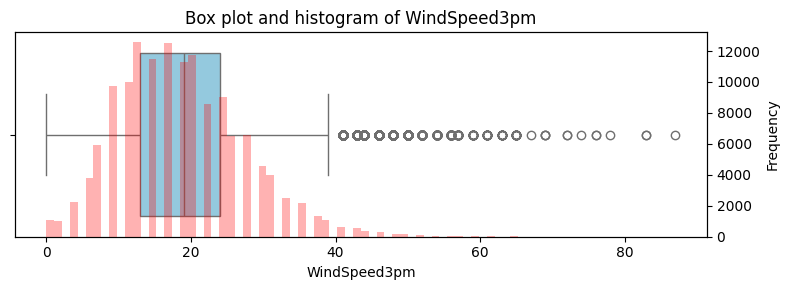

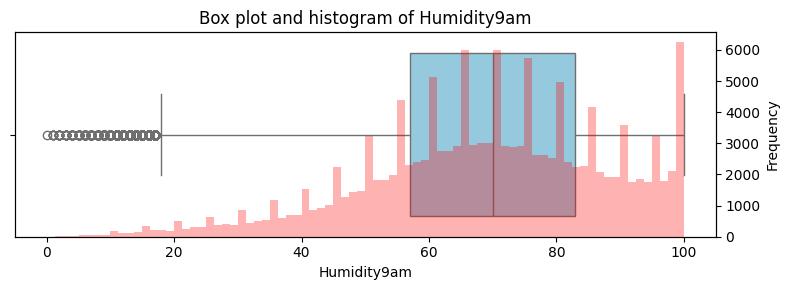

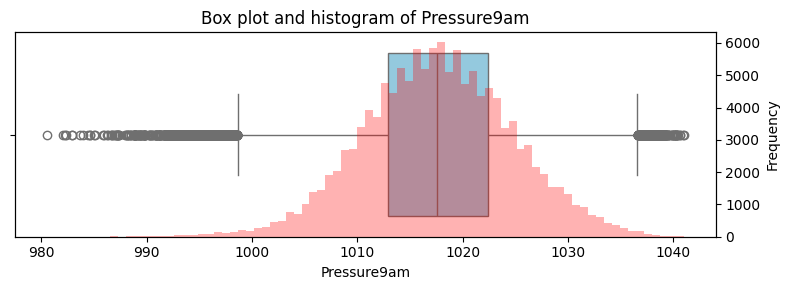

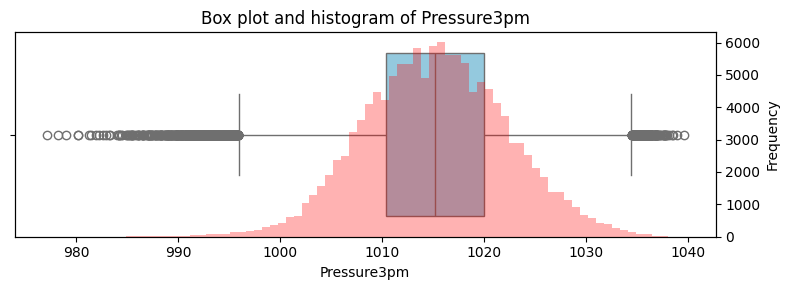

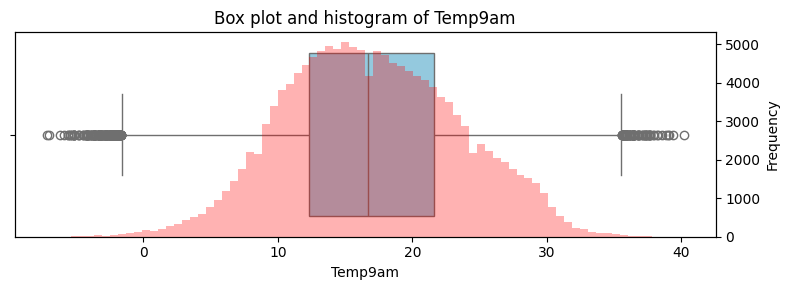

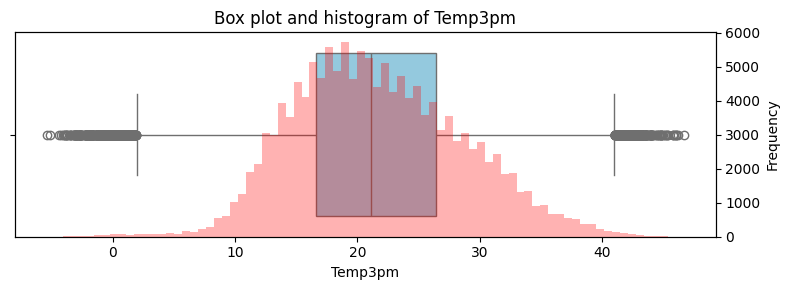

In [ ]:
# Select the features with outliers
outlier_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
                         'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                         'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

# Visulize the outliers using box plots and histograms
for feature in outlier_features:
    fig, ax1 = plt.subplots(figsize=(8, 3))
    
    sns.boxplot(x=weather_df[feature], ax=ax1, color='skyblue')
    ax1.set_title(f'Box plot and histogram of {feature}')
    ax1.set_xlabel(feature)
    ax1.set_yticklabels([])
    
    ax2 = ax1.twinx()
    sns.histplot(weather_df[feature], bins=80, ax=ax2, color='red', alpha=0.3, edgecolor=None)
    ax2.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

### **Dataset Preprocessing**

In [19]:
# Create a copy of the original dataset for preprocessing and comparison
weather_orig_df = weather_df.copy()
categorical_columns = weather_df.select_dtypes(include='object').columns
numerical_columns = weather_df.select_dtypes(include=['int64', 'float64']).columns

# Fill missing categorical values with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
weather_orig_df[categorical_columns] = cat_imputer.fit_transform(weather_orig_df[categorical_columns])

# Fill missing numerical values with mean
num_imputer = SimpleImputer(strategy='mean')
weather_orig_df[numerical_columns] = num_imputer.fit_transform(weather_orig_df[numerical_columns])
weather_orig_df[categorical_columns].isna().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [20]:
# Create a copy of the original dataset for preprocessing and comparison
weather_imp_df = weather_df.copy()

# Drop important features samples with missing values
weather_imp_df.dropna(subset=['RainTomorrow', 'RainToday'], inplace=True)
weather_imp_df[['RainTomorrow', 'RainToday']].isnull().sum()

RainTomorrow    0
RainToday       0
dtype: int64

In [21]:
# Fill missing categorical values with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
weather_imp_df[categorical_columns] = cat_imputer.fit_transform(weather_imp_df[categorical_columns])
weather_imp_df[categorical_columns].isna().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [ ]:
# Fill missing numerical values with KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
weather_imp_df[numerical_columns] = knn_imputer.fit_transform(weather_imp_df[numerical_columns])
weather_imp_df[numerical_columns].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [ ]:
# Encode categorical features to numerical values
le = LabelEncoder()
for column in categorical_columns:
    weather_orig_df[column] = le.fit_transform(weather_orig_df[column])
    weather_imp_df[column] = le.fit_transform(weather_imp_df[column])

weather_imp_df.head()

,Unique,Missing,Type,Sample,Duplicate
Date,3436,0,int64,396.00,0
Location,49,0,int64,2.00,0
MinTemp,700,0,float64,13.40,0
MaxTemp,710,0,float64,22.90,0
Rainfall,679,0,float64,0.60,0
Evaporation,1847,0,float64,5.88,0
Sunshine,1462,0,float64,11.60,0
WindGustDir,16,0,int64,13.00,0
WindGustSpeed,355,0,float64,44.00,0
WindDir9am,16,0,int64,13.00,0


In [106]:
# Calculate IQR and remove outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

features_with_outlier = weather_imp_df.drop(columns=['Date', 'Sunshine', 'WindGustDir', 'WindDir9am',
                                            'WindDir3pm', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 
                                            'RainToday', 'RainTomorrow']).columns

# Remove the outliers twice to ensure that they are removed
sample_size = weather_imp_df.shape[0]

for column in features_with_outlier:
    weather_imp_df = handle_outliers(weather_imp_df, column)
    weather_imp_df = handle_outliers(weather_imp_df, column)

print(f'Outliers removed: {sample_size - weather_imp_df.shape[0]}')

Outliers removed: 59595


In [57]:
# Split the original dataset
X_orig = weather_orig_df.drop(columns=['RainTomorrow'], axis=1)
y_orig = weather_orig_df['RainTomorrow']

X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X_orig, y_orig, test_size=0.2, random_state=17)

train_test_shape = pd.DataFrame({
    'Training' : (X_orig_train.shape[0], y_orig_train.shape[0]),
    'Testing' : (X_orig_test.shape[0], y_orig_test.shape[0]),
    'Total' : (X_orig.shape[0], y_orig.shape[0])
})
train_test_shape

,Training,Testing,Total
0,116368,29092,145460
1,116368,29092,145460


In [ ]:
# Split the preprocessed dataset
X = weather_imp_df.drop(columns=['RainTomorrow'], axis=1)
y = weather_imp_df['RainTomorrow']

# Select the best features using SelectKBest
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]
X = pd.DataFrame(X_new, columns=selected_features)

# Standardize the features
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

# Split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Selected Features:')
print(selected_features)

train_test_shape = pd.DataFrame({
    'Training' : (X_train.shape[0], y_train.shape[0]),
    'Testing' : (X_test.shape[0], y_test.shape[0]),
    'Total' : (X.shape[0], y.shape[0])
})
train_test_shape

Selected Features:
Index(['Sunshine', 'Humidity3pm'], dtype='object')


c:\Users\Jhondale\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 4 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Jhondale\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Training,Testing,Total
0,64953,16239,81192
1,64953,16239,81192


## **Model Training**

In [58]:
# Train the model with original dataset
lr_orig_model = LogisticRegression(solver='liblinear', random_state=17)
lr_orig_model.fit(X_orig_train, y_orig_train)

LogisticRegression(random_state=17, solver='liblinear')

In [181]:
# Train the model with the proper parameters
model = LogisticRegression(penalty='l2', C=1.3, solver='liblinear', random_state=17)
model.fit(X_train, y_train)

LogisticRegression(C=1.3, random_state=17, solver='liblinear')

### **Model Evaluation**

In [ ]:
# Evaluate the model scores of original dataset
y_train_orig_pred = lr_orig_model.predict(X_orig_train)
y_test_orig_pred = lr_orig_model.predict(X_orig_test)

train_acc = accuracy_score(y_orig_train, y_train_orig_pred)
test_acc = accuracy_score(y_orig_test, y_test_orig_pred)
cv_scores = cross_val_score(lr_orig_model, X_orig, y_orig, cv=5)

orig_eval_result = pd.DataFrame({
    'Model': 'Logistic Regression',
    'Training Accuracy': train_acc,
    'Testing Accuracy': test_acc,
    'Cross-Val Mean': cv_scores.mean()
})
orig_eval_result

,Model,Training Accuracy,Testing Accuracy,Cross-Val Mean
0,Logistic Regression,0.841211,0.843531,0.838368


In [ ]:
# Evaluate the model scores of preprocessed dataset
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
cv_scores = cross_val_score(model, X, y, cv=5)

pro_eval_result = pd.DataFrame({
    'Model': 'Logistic Regression',
    'Training Accuracy': train_acc,
    'Testing Accuracy': test_acc,
    'Cross-Val Mean': cv_scores.mean()
})
pro_eval_result

,Model,Training Accuracy,Testing Accuracy,Cross-Val Mean
0,Logistic Regression,0.884809,0.892235,0.885654


In [45]:
# Create a DataFrame from the markdown content
evaluation_data = {
    'Dataset': [
        'Original Dataset with mean and most frequent',
        'Dataset with most frequent and KNNImputer',
        'Dataset without outlier',
        'Dataset without outlier and scaled',
        'Model using Sunshine and Humidity3pm'
    ],
    'Training Accuracy': [0.841211, 0.847055, 0.891568, 0.892476, 0.884809],
    'Testing Accuracy': [0.843531, 0.850309, 0.893343, 0.896299, 0.892235],
    'Cross-Val Mean': [0.838368, 0.844389, 0.838368, 0.891012, 0.885654]
}

evaluation_df = pd.DataFrame(evaluation_data)
evaluation_df

,Dataset,Training Accuracy,Testing Accuracy,Cross-Val Mean
0,Original Dataset with mean and most frequent,0.841211,0.843531,0.838368
1,Dataset with most frequent and KNNImputer,0.847055,0.850309,0.844389
2,Dataset without outlier,0.891568,0.893343,0.838368
3,Dataset without outlier and scaled,0.892476,0.896299,0.891012
4,Model using Sunshine and Humidity3pm,0.884809,0.892235,0.885654


In [65]:
# Evaluate the classification report of original dataset
y_orig_test_pred = lr_orig_model.predict(X_orig_test)
class_orig_report = classification_report(y_orig_test, y_orig_test_pred, output_dict=True)
class_report_orig_df = pd.DataFrame(class_orig_report).transpose()
class_report_orig_df

,precision,recall,f1-score,support
0,0.866065,0.946694,0.904586,22793.000000
1,0.709121,0.470233,0.565483,6299.000000
accuracy,0.843531,0.843531,0.843531,0.843531
macro avg,0.787593,0.708464,0.735035,29092.000000
weighted avg,0.832083,0.843531,0.831164,29092.000000


In [ ]:
# Evaluate the classification report of the preprocessed dataset
y_test_pred = model.predict(X_test)
class_report = classification_report(y_test, y_test_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
0.0,0.906745,0.982413,0.943064,14272.000000
1.0,0.676546,0.266904,0.382793,1967.000000
accuracy,0.895745,0.895745,0.895745,0.895745
macro avg,0.791646,0.624659,0.662928,16239.000000
weighted avg,0.878862,0.895745,0.875199,16239.000000


In [ ]:
smote_report = {
    'precision': [0.957646, 0.309482],
    'recall': [0.778313, 0.742693],
    'f1-score': [0.858717, 0.436905],
    'support': [14322.0, 1916.0]
}

smote_report_df = pd.DataFrame(smote_report, index=['0', '1'])
smote_report_df.loc['accuracy'] = [0.774110, 0.774110, 0.774110, 16238.0]
smote_report_df.loc['macro avg'] = [0.633564, 0.760503, 0.647811, 16238.0]
smote_report_df.loc['weighted avg'] = [0.881166, 0.774110, 0.808945, 16238.0]

print('SMOTE Classification Report')
smote_report_df

SMOTE Classification Report


,precision,recall,f1-score,support
0,0.957646,0.778313,0.858717,14322.0
1,0.309482,0.742693,0.436905,1916.0
accuracy,0.774110,0.774110,0.774110,16238.0
macro avg,0.633564,0.760503,0.647811,16238.0
weighted avg,0.881166,0.774110,0.808945,16238.0


In [ ]:
# Convert CTGAN classification report into a DataFrame
ctgan_report = {
    'precision': [0.868539, 0.702301],
    'recall': [0.943967, 0.480569],
    'f1-score': [0.904684, 0.570653],
    'support': [14313.0, 3937.0]
}

ctgan_report_df = pd.DataFrame(ctgan_report, index=['0', '1'])
ctgan_report_df.loc['accuracy'] = [0.844000, 0.844000, 0.844000, 18250.0]
ctgan_report_df.loc['macro avg'] = [0.785420, 0.712268, 0.737668, 18250.0]
ctgan_report_df.loc['weighted avg'] = [0.832678, 0.844000, 0.832625, 18250.0]

print('CTGAN Classification Report')
ctgan_report_df

CTGAN Classification Report


,precision,recall,f1-score,support
0,0.868539,0.943967,0.904684,14313.0
1,0.702301,0.480569,0.570653,3937.0
accuracy,0.844000,0.844000,0.844000,18250.0
macro avg,0.785420,0.712268,0.737668,18250.0
weighted avg,0.832678,0.844000,0.832625,18250.0


### **Model Visualization**

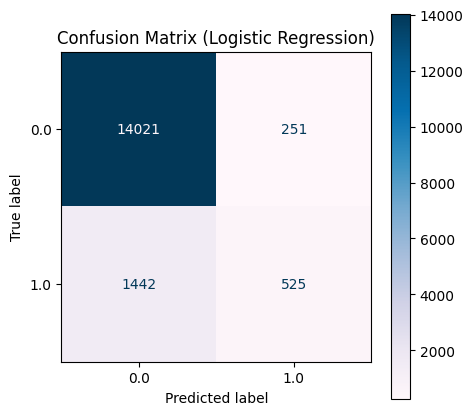

In [ ]:
# Visualize the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

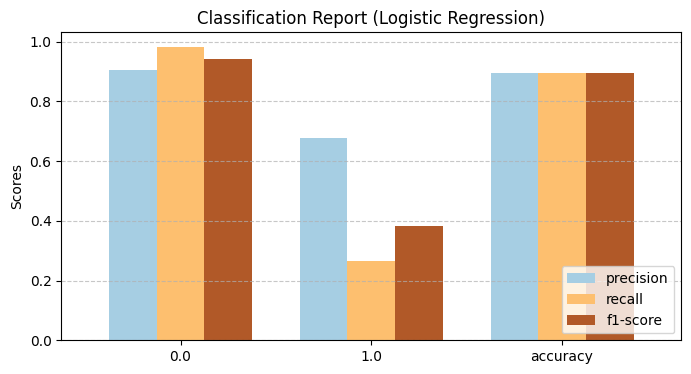

In [ ]:
# Visualize the Classification Report
y_pred = model.predict(X_test)
class_report = classification_report(y_test, y_test_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

# Filter to include only precision, recall, and f1-score
metrics_to_plot = ['precision', 'recall', 'f1-score']
class_report_df_filtered = class_report_df[metrics_to_plot]
bar_width = 0.75

class_report_df_filtered[:-2].plot(kind='bar', figsize=(8, 4), colormap='Paired', width=bar_width)
plt.title('Classification Report (Logistic Regression)')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

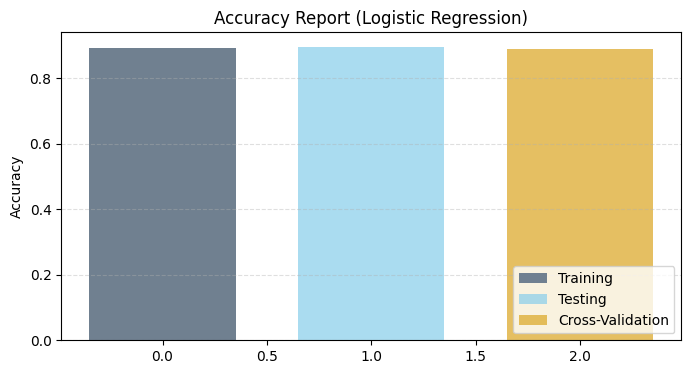

In [ ]:
# Visualize Model Training, Testing and Cross-validation Scores
plt.figure(figsize=(8, 4))
bar_width = 0.7
index = np.arange(len(pro_eval_result))

plt.bar(index, pro_eval_result['Training Accuracy'], bar_width, color='slategrey', label='Training')
plt.bar(index + bar_width + 0.3, pro_eval_result['Testing Accuracy'], bar_width, color='skyblue', alpha=0.7, label='Testing')
plt.bar(index + 2 * (bar_width + 0.3), pro_eval_result['Cross-Val Mean'], bar_width, color='goldenrod', alpha=0.7, label='Cross-Validation')

plt.ylabel('Accuracy')
plt.title('Accuracy Report (Logistic Regression)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(loc='lower right')
plt.show()

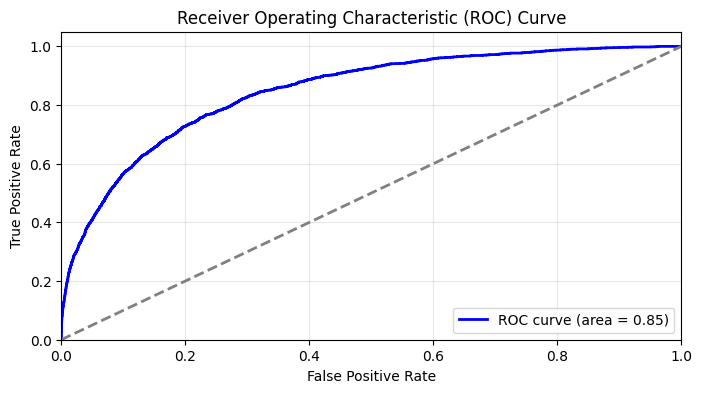

In [ ]:
# Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

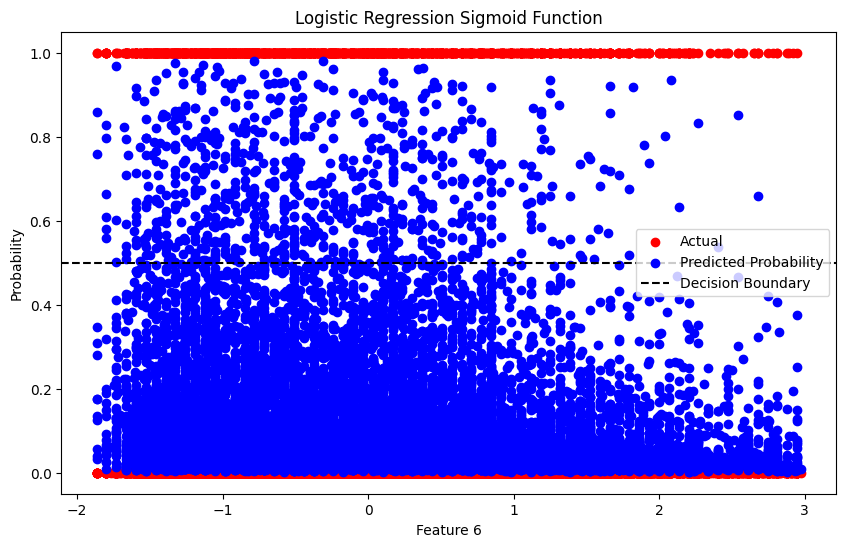

In [157]:
# Visualize the sigmoid function and decision boundary
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Select a specific feature from X_test for plotting
feature_index = 0  # index of Sunshine
X_test_feature = X_test[:, feature_index]

# Plot the sigmoid function
plt.figure(figsize=(10, 6))
plt.scatter(X_test_feature, y_test, color='red', label='Actual')
plt.scatter(X_test_feature, y_pred_prob, color='blue', label='Predicted Probability')
plt.axhline(0.5, color='black', linestyle='--', label='Decision Boundary')
plt.xlabel(f'Feature {feature_index + 1}')
plt.ylabel('Probability')
plt.title('Logistic Regression Sigmoid Function')
plt.legend()
plt.show()

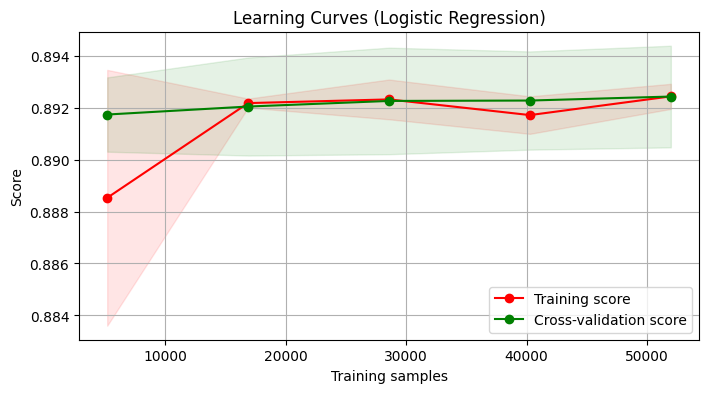

In [ ]:
# Visualize the model learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(8, 4))
plt.title('Learning Curves (Logistic Regression)')
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.legend(loc='best')
plt.show()